# Case Study - Cover Type Prediction  

The goal of this project is to help predict forest cover type from the provided cartographic variables.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## - Exploratory Data Analysis:
The data set is consist of  581012 observation, 12 predictors and 1 response. 

Accoding to the description, the response variable respresents the actual forest cover type for a given observation (30 x 30 meter cell). Cover types are classified into 7 unique categories. There are 12 explanatory variables, including 10 quantitative and 2 categorical variables, with 40 and 4 categories respectively. 








###  Import & clean data


In [2]:
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21','Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
cn_quant = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
cn_qual = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21','Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
data = pd.read_csv('covtype.txt', names=col_names)

In [3]:
# Create new categorical column 'Soil_Type' denoting the type of soil of the area.
Soil = data.loc[:,'Soil_Type1':'Soil_Type40']
def soil_type(row):
    for c in Soil.columns:
        if row[c]==1:
            return c  

data['Soil_Type']=Soil.apply(soil_type, axis=1)

In [6]:
# Create new categorical column 'Wilderness_Type' denoting the type of Wilderness of the area.
Wilderness = data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']
def wilderness_type(row):
    for c in Wilderness.columns:
        if row[c]==1:
            return c  
data['Wilderness_Type']=Wilderness.apply(wilderness_type, axis=1)

### Exporatory Analysis

In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Type,Wilderness_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,2,Soil_Type12,Wilderness_Area1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,2,Soil_Type30,Wilderness_Area1
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1


In [8]:
num_rows, num_cols = data.shape
(num_rows, num_cols)

(581012, 57)

### Visualization

In [52]:
data.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

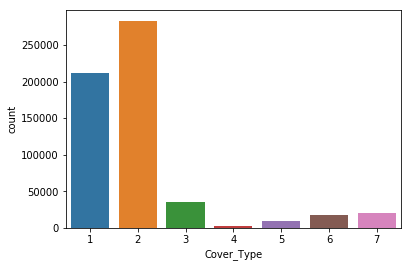

In [51]:
sns.countplot(data=data,x=data['Cover_Type'])

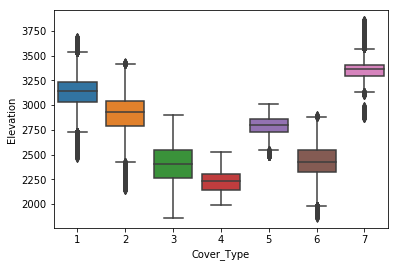

In [10]:
sns.boxplot(x="Cover_Type", y='Elevation', data=data)

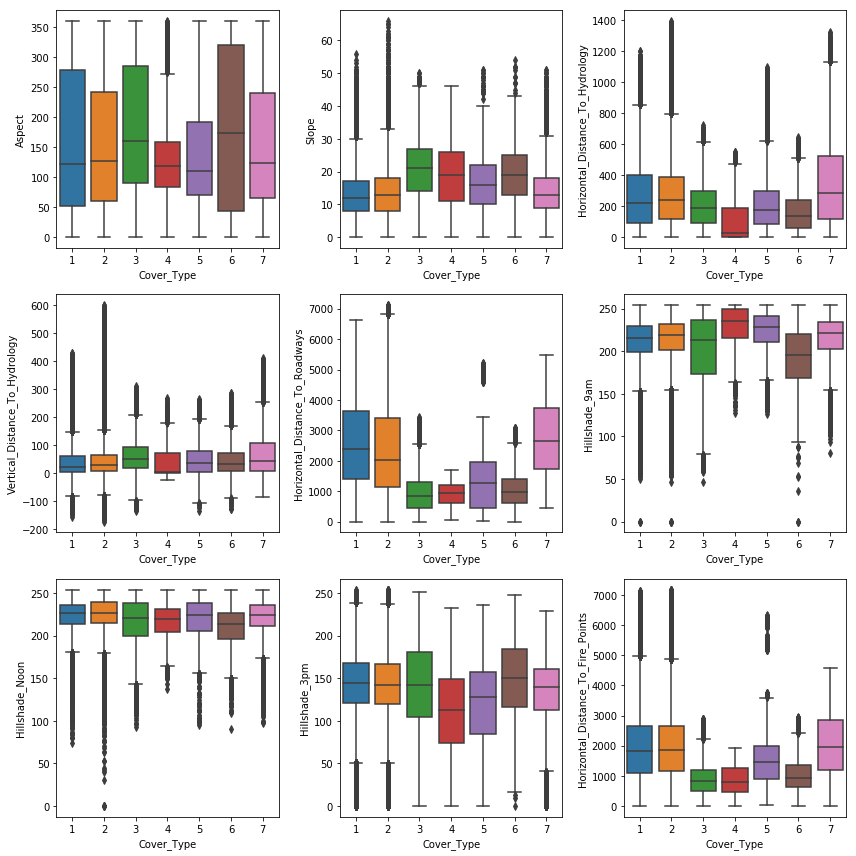

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
for i in range(1,len(cn_quant)):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Cover_Type", y=cn_quant[i], data=data)
fig.tight_layout()

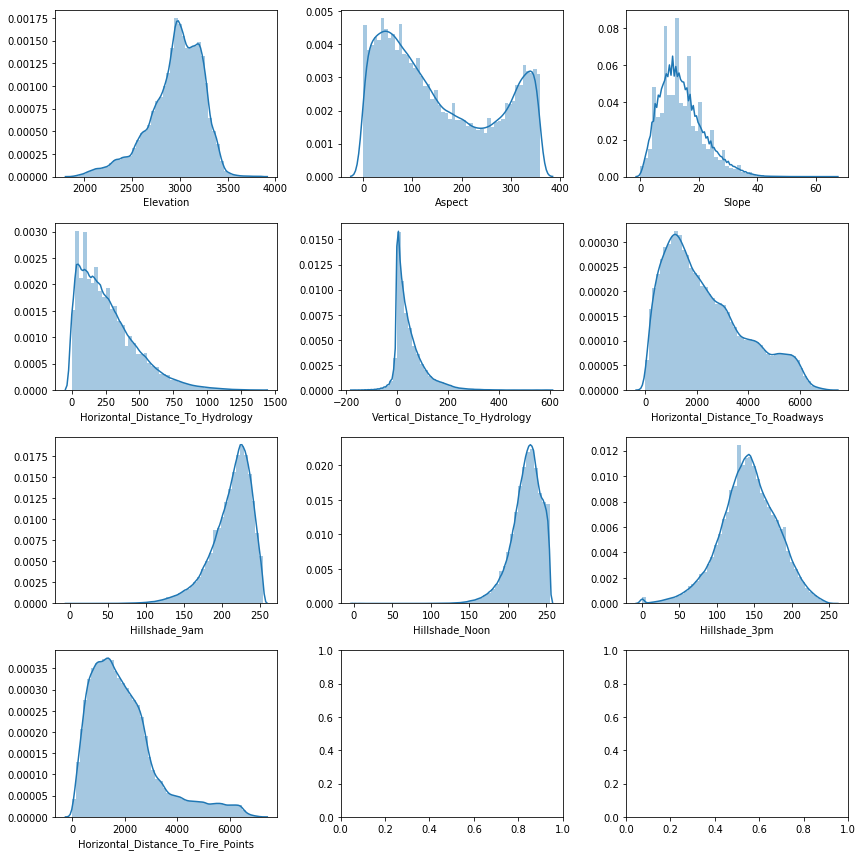

In [12]:
fig2, axes2 = plt.subplots(nrows=4, ncols=3, figsize=(12,12))
for i in range(len(cn_quant)):
    plt.subplot(4, 3, i+1)
    sns.distplot(data[cn_quant[i]])
fig2.tight_layout()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

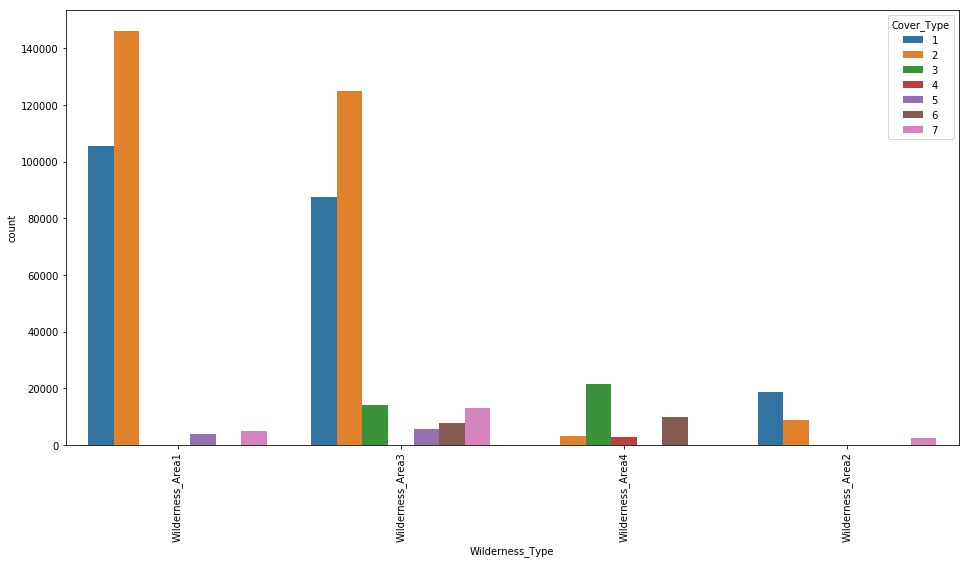

In [13]:

plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

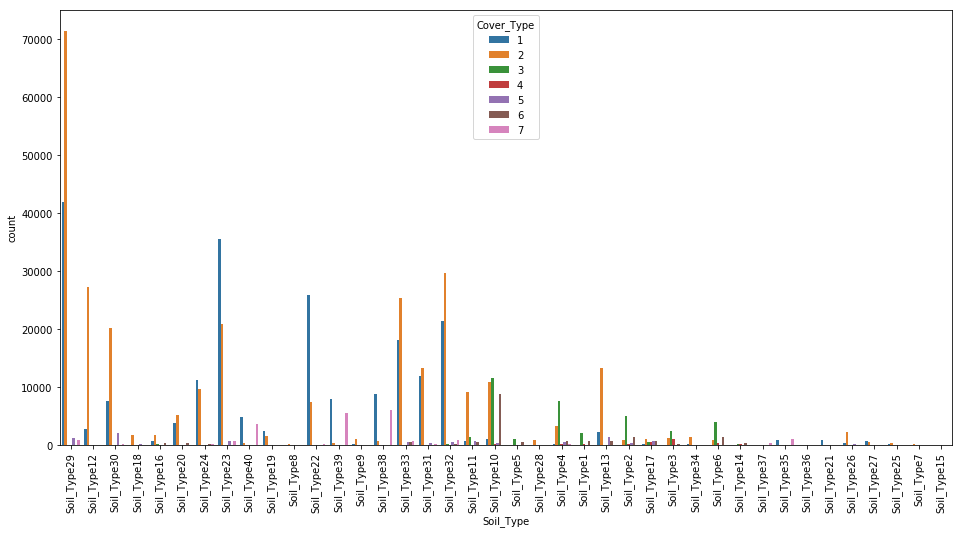

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=data)
plt.xticks(rotation=90)

### Partition data into training and testing

In [15]:
response = data['Cover_Type']
variables = data.drop(['Cover_Type', 'Soil_Type', 'Wilderness_Type'], axis=1)

In [16]:
(variables.shape, response.shape)

((581012, 54), (581012,))

In [17]:
pd.set_option('display.max_columns', None)
variables.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [18]:
variables_train, variables_test, response_train, response_test = train_test_split(variables, response, test_size=0.2, random_state=42)

## Analysis

### Random Forest

#### Model Building

Default model

In [19]:
# Overfitting?
rf_default=RandomForestClassifier(n_estimators=300,class_weight='balanced',n_jobs=2,random_state=42)


In [20]:
start = time.clock()
rf_default.fit(variables_train, response_train)
end = time.clock()
print('Training Time', end - start)

C:\Users\16464\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Training Time 176.29640720000003


C:\Users\16464\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
rf_default

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=2, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [21]:
pred=rf_default.predict(variables_test)

Hyperparameter tuneing

In [23]:
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional 
# to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
rf=RandomForestClassifier()

In [24]:
# Hyperparameter tuneing with exhaustive grid search: Worth it?
n_estimators = [300]
max_depth = [5, 15]
min_samples_split = [2, 5]
min_samples_leaf = [1, 5] 

hyper = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
            class_weight = ['balanced'])

grid = GridSearchCV(rf, hyper, cv = 3, verbose = 1, 
                      n_jobs = -1)

In [25]:
start = time.clock()
bestparam = grid.fit(variables_train, response_train)
end = time.clock()
print('Training Time', end - start)

C:\Users\16464\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 15.6min finished


Training Time 1148.2978954999999


C:\Users\16464\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
bestparam

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300], 'max_depth': [5, 15], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 5], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [28]:
response_predicted = bestparam.predict(variables_test)

#### Assess Accuracy

In [29]:
accuracy=rf_default.score(variables_test,response_test)
print('Accuracy without tuning and CV', accuracy)

Accuracy without tuning and CV 0.9563436400092941


In [30]:
accuracy_tuned=bestparam.score(variables_test,response_test)
print('Tuned Accuracy after CV = ', accuracy_tuned)

Tuned Accuracy after CV =  0.8056934846776761


#### Report

Default model

In [31]:
from sklearn.metrics import classification_report
print(classification_report(response_test, pred))

              precision    recall  f1-score   support

           1       0.97      0.94      0.96     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.97      0.95      7121
           4       0.91      0.84      0.87       526
           5       0.94      0.79      0.86      1995
           6       0.94      0.89      0.91      3489
           7       0.97      0.95      0.96      4015

   micro avg       0.96      0.96      0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



<Figure size 648x432 with 0 Axes>

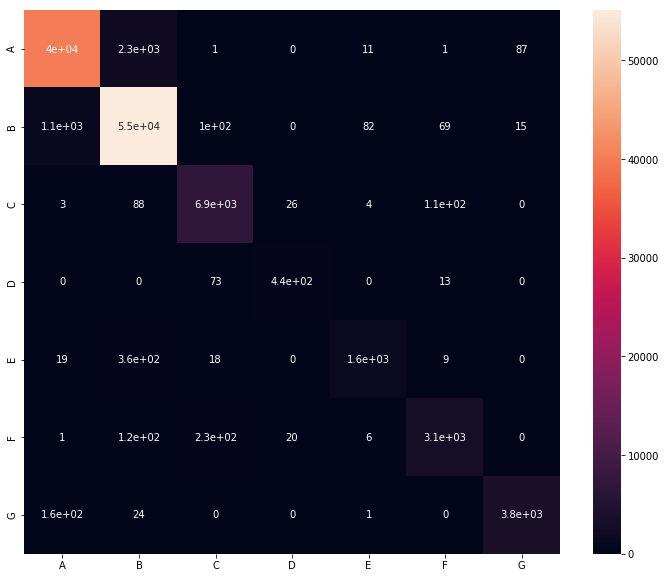

In [34]:
conf_mat = confusion_matrix(response_test, pred)
plt.figure(1, figsize=(9,6))
df_cm1 = pd.DataFrame(conf_mat, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm1, annot=True)

Tuned Model

In [35]:
print(classification_report(response_test, response_predicted))

              precision    recall  f1-score   support

           1       0.82      0.83      0.83     42557
           2       0.89      0.75      0.82     56500
           3       0.84      0.87      0.85      7121
           4       0.68      0.93      0.78       526
           5       0.27      0.94      0.42      1995
           6       0.60      0.90      0.72      3489
           7       0.77      0.97      0.85      4015

   micro avg       0.81      0.81      0.81    116203
   macro avg       0.70      0.88      0.75    116203
weighted avg       0.84      0.81      0.81    116203



<Figure size 648x432 with 0 Axes>

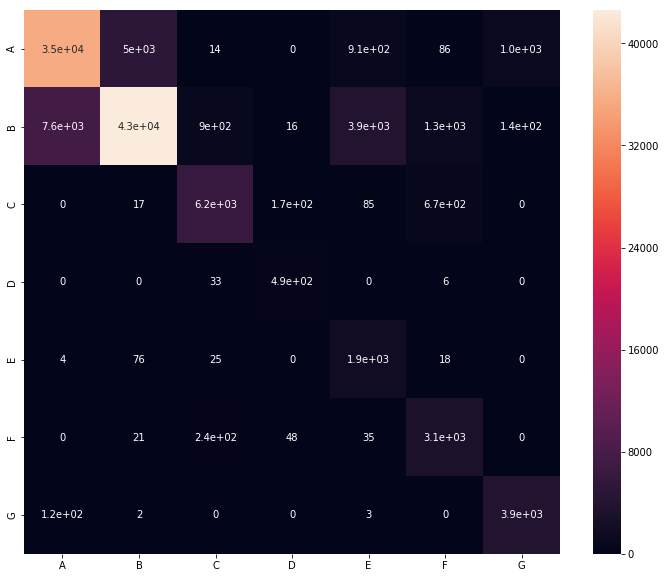

In [36]:
conf_mat2 = confusion_matrix(response_test, response_predicted)
plt.figure(1, figsize=(9,6))
df_cm2 = pd.DataFrame(conf_mat2, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm2, annot=True)

#### Determine Feature Importance

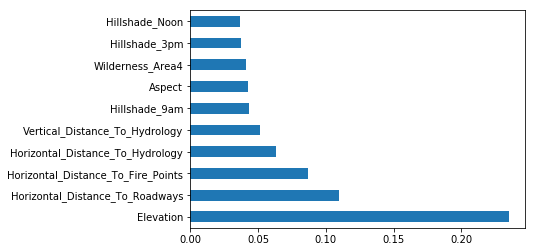

In [50]:
feat_importances = pd.Series(rf_default.feature_importances_, index=variables_test.columns)
feat_importances.nlargest(10).plot(kind='barh')